<a href="https://colab.research.google.com/github/truongkhng/AI-Projects/blob/main/VN_Money_Classify_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [9]:
def create_img_dataset(raw_folder,dataset_name):

    target_size = (150, 150)
    pictures = []
    labels = []

    for folder in listdir(raw_folder):
      #print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        #print("File=", file)
        pictures.append(cv2.resize(cv2.imread(raw_folder + "/" + folder + "/" + file)
                                              ,dsize = target_size))
        labels.append(folder)

    pictures = np.array(pictures)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)

    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)

    file.close()

def load_data(dataset_path):

    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()

    return pictures, labels

In [15]:
raw_folder = "/content/drive/MyDrive/money"

create_img_dataset(raw_folder= raw_folder,dataset_name= 'money.txt')
dataset_path = "money.txt"
x_data,y_data = load_data(dataset_path= 'money.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)


In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1242, 150, 150, 3)
(1242, 9)
(311, 150, 150, 3)
(311, 9)


In [17]:
x_test_original = x_test;
y_test_original = y_test;
x_label = ['1000','2000','5000','10.000','20.000','50.000','100.000','200.000','500.000']

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#y_train = np_utils.to_categorical(y_train,9)
#y_test = np_utils.to_categorical(y_test,9)

In [ ]:
model = Sequential()
model.add (Conv2D(32,(3,3),activation='relu',kernel_initializer='normal',padding='same',
                  input_shape=(150,150,3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dense(9,activation='softmax'))
model.summary()

In [30]:
checkpoint = ModelCheckpoint(filepath= "VNMoney-weights-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=100,batch_size = 128,validation_data=(x_test,y_test),verbose=1,callbacks=callbacks_list)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.4095 - accuracy: 0.9130
Epoch 1: val_accuracy improved from -inf to 0.11254, saving model to VNMoney-weights-01-0.1125.h5
10/10 [==============================] - 5s 381ms/step - loss: 0.4095 - accuracy: 0.9130 - val_loss: 18.9422 - val_accuracy: 0.1125
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.0729 - accuracy: 0.9791
Epoch 2: val_accuracy improved from 0.11254 to 0.14791, saving model to VNMoney-weights-02-0.1479.h5
10/10 [==============================] - 4s 364ms/step - loss: 0.0729 - accuracy: 0.9791 - val_loss: 9.9339 - val_accuracy: 0.1479
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9887
Epoch 3: val_accuracy did not improve from 0.14791
10/10 [==============================] - 3s 341ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 12.2075 - val_accuracy: 0.1383
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0

In [31]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23836848139762878
Test accuracy: 0.9421221613883972


In [33]:
model_json = model.to_json()
with open('VNMoney_config.json', 'w') as json_file:
    json_file.write(model_json)

picture  26
actual: [0 0 0 0 0 0 1 0 0]
predictions: [6]
predictions label: 100.000


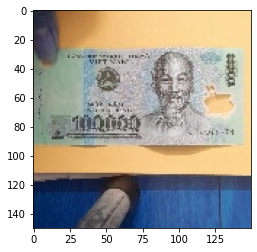

In [53]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

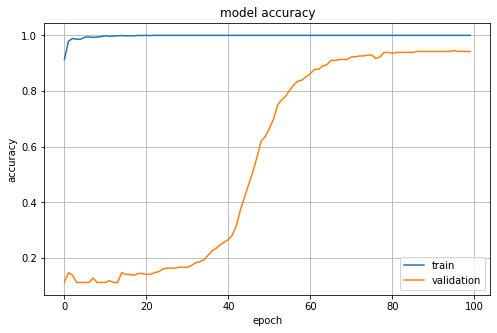

In [46]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()